In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

# Load the dataset
df = pd.read_csv('Iris.csv')
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Dataset shape: (150, 6)

First few rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [2]:
# Basic information about the dataset
print("Dataset info:")
print(df.info())
print("\nSpecies distribution:")
print(df['Species'].value_counts())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Prepare features and target
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set size: {X_train_scaled.shape}")
print(f"Test set size: {X_test_scaled.shape}")

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Species distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Missing values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Training set size: (105, 4)
Test set size: (45, 4)


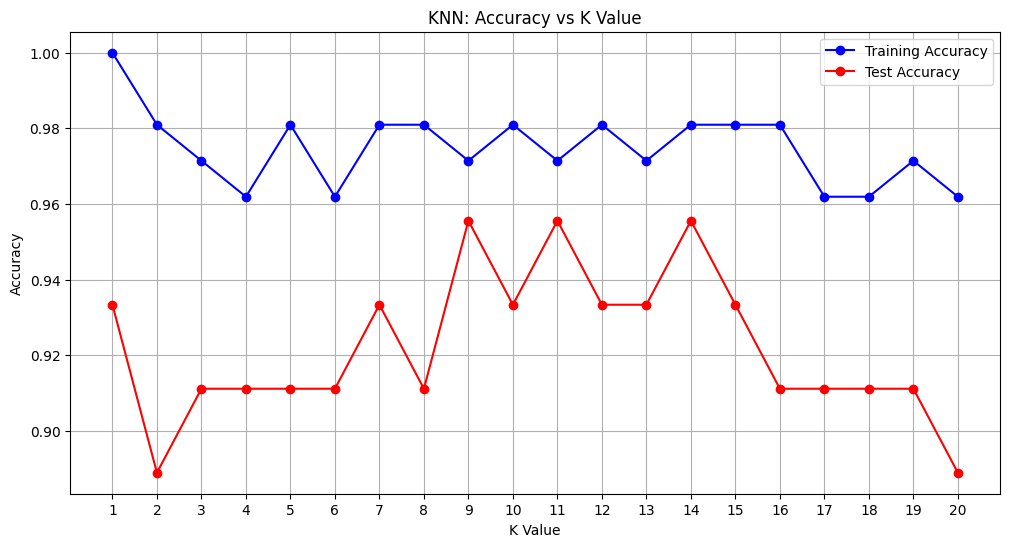

In [3]:
# Experiment with different K values
k_values = range(1, 21)
train_accuracy = []
test_accuracy = []

for k in k_values:
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    knn.fit(X_train_scaled, y_train)
    
    # Calculate accuracies
    train_pred = knn.predict(X_train_scaled)
    test_pred = knn.predict(X_test_scaled)
    
    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test, test_pred))

# Plot accuracy vs K values
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_accuracy, 'b-', label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracy, 'r-', label='Test Accuracy', marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs K Value')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()

In [4]:
# Find the best K value
best_k = k_values[np.argmax(test_accuracy)]
best_accuracy = max(test_accuracy)

print(f"Best K value: {best_k}")
print(f"Best test accuracy: {best_accuracy:.4f}")

# Train final model with best K
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = final_knn.predict(X_test_scaled)

# Final accuracy
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final model accuracy: {final_accuracy:.4f}")

Best K value: 9
Best test accuracy: 0.9556
Final model accuracy: 0.9556


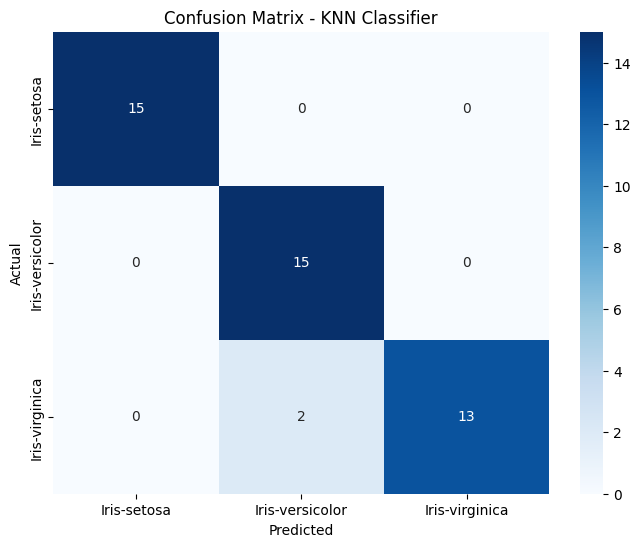


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [5]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=final_knn.classes_, 
            yticklabels=final_knn.classes_)
plt.title('Confusion Matrix - KNN Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

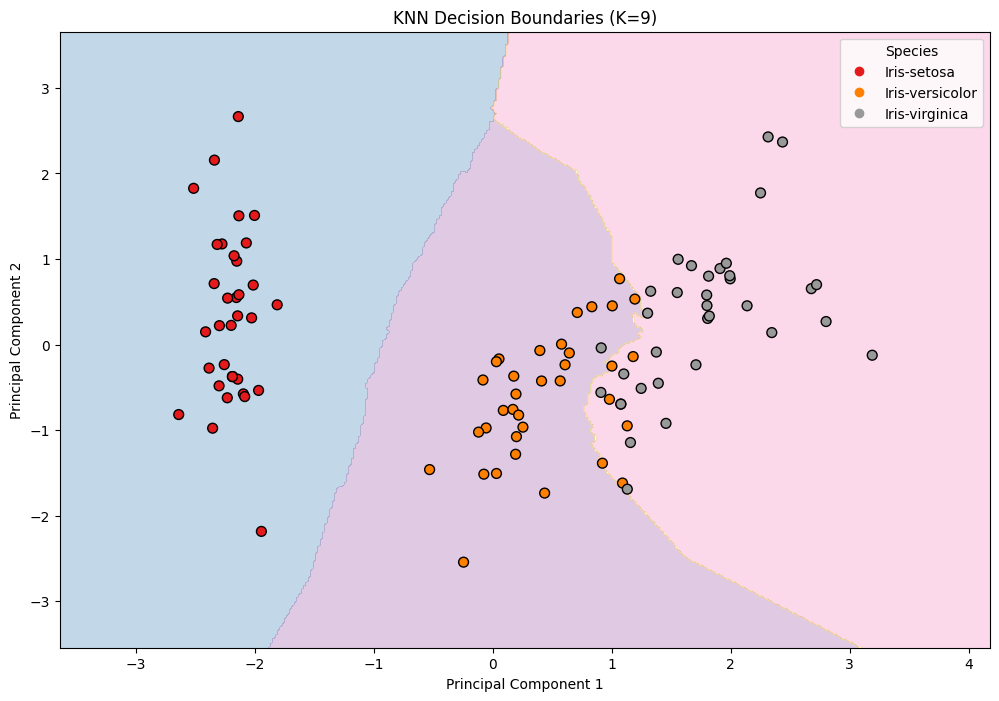

In [7]:
# Since we have 4 features, we'll visualize 2 most important ones
from sklearn.decomposition import PCA
import numpy as np

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

# Train KNN on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_train_2d, y_train)

# Convert string labels to numerical values for contour plotting
label_to_num = {label: i for i, label in enumerate(np.unique(y_train))}
y_train_num = np.array([label_to_num[label] for label in y_train])

# Create mesh grid for decision boundaries
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict for each point in mesh and convert to numerical
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z_num = np.array([label_to_num[label] for label in Z])
Z_num = Z_num.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(12, 8))
contour = plt.contourf(xx, yy, Z_num, alpha=0.3, cmap=plt.cm.Set1, levels=len(label_to_num))

# Plot training points
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_num, 
                     cmap=plt.cm.Set1, edgecolor='black', s=50)

# Create legend
legend_labels = list(label_to_num.keys())
plt.legend(handles=scatter.legend_elements()[0], 
           labels=legend_labels,
           title="Species")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'KNN Decision Boundaries (K={best_k})')
plt.show()

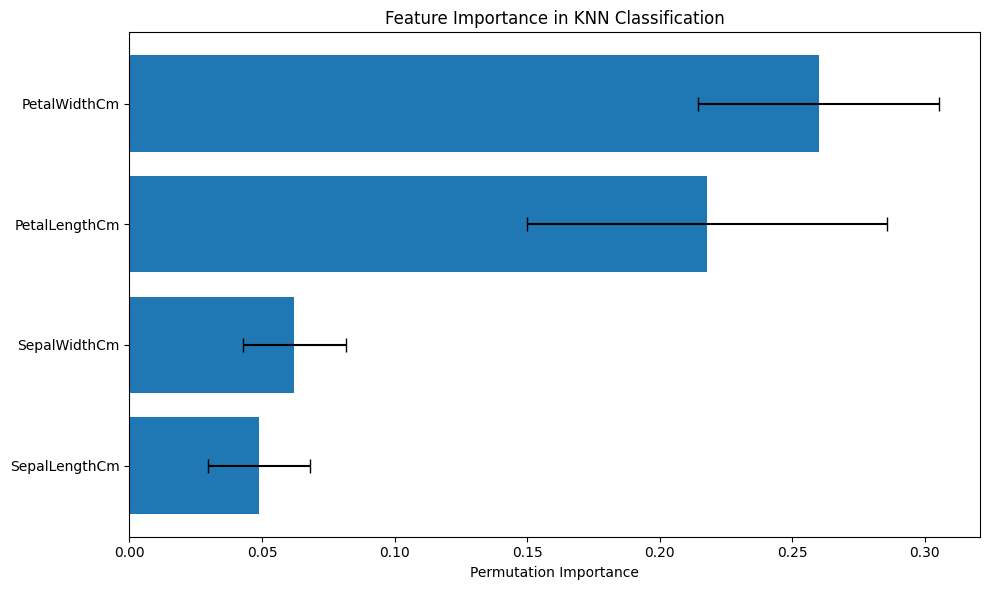

In [8]:
# Calculate feature importance using permutation importance
from sklearn.inspection import permutation_importance

result = permutation_importance(final_knn, X_test_scaled, y_test, 
                               n_repeats=10, random_state=42)

# Plot feature importance
feature_names = X.columns
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': result.importances_mean,
    'std': result.importances_std
}).sort_values('importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'], 
         xerr=importance_df['std'], capsize=5)
plt.xlabel('Permutation Importance')
plt.title('Feature Importance in KNN Classification')
plt.tight_layout()
plt.show()